## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:

train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')


## Basic Exploration

In [3]:

train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


## Preprocessing

In [4]:
''.join(train_df['text'].tolist())[:1500]

'umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrikai-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layothe province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be monthso netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbjkhomishini ya ndinganyiso ya mbeu yo ewa maana

**Convert all characters to lower_case**

In [5]:
# convert all the text to lower case
train_df['text'] = train_df['text'].str.lower()

**Remove Punctuations**

In [6]:

print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:

def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [8]:
train_df['text'] = train_df['text'].apply(remove_punctuation)

**Remove numeric characters**

In [9]:
train_df['text'] = train_df['text'].str.replace('\d+', '')

In [10]:
' '.join(train_df['text'].tolist())[:1500]

'umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo the province of kwazulunatal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj khomishini ya ndinganyiso ya mbeu yo ewa maana

In [11]:

# convert all the text to lower case
test_df['text'] = test_df['text'].str.lower()
# remove punctuation
test_df['text'] = test_df['text'].apply(remove_punctuation)
# remove numeric characters
test_df['text'] = test_df['text'].str.replace('\d+', '')

**Just checking again😌**

In [12]:

' '.join(test_df['text'].tolist())[:1500]


'mmasepala fa maemo a a kgethegileng a letlelela kgato eo uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho tshivhumbeo tshi fana na ngano dza vhathu kube inja nelikati betingevakala kutsi titsini naticocisana winste op buitelandse valuta ke feela dilense tše hlakilego tša pono e tee goba tše pedi tšeo di lefelelwago kgetho ya diforeimo e a hwetšagala yeo maloko a ka kgethago go tšwa go yona ge o nyaka foreimo ya go bitša ga nnyane o tla swanelwa ke go lefelela phapano yeo fn am  final gems birthing optionszulutxtfn ntjhafatso ya konteraka ya mosebetsi etsa bonnete hore tsohle tse lokelwang ho ngolwa fatshe di entswe ugems uhlinzeka ngezinzuzo zemithi yezifo ezingapheli kuwo wonke amalunga ukuze ukwazi ukuthola imithi yezifo ezingapheli kufanele ubhalise ohlelweni lwemithi yezifo ezingapheli emva kokuthola isaziso sokuthi iyilunga elibhalisiwe lakwagems so on occasion are statistics misused janewari la ngwaga ofe kapa dikholego

**Splitting into dependent (y) and independent (X) variable**

In [13]:
X = train_df['text']
y = train_df['lang_id']


**Yeah, It's label encoding time😌😌**

In [14]:
le = LabelEncoder()
y = le.fit_transform(y)

**Vectorise this thing man!!!**

In [15]:
# instantiate the tfidf vectorizer
tfidf = TfidfVectorizer(max_features=10000)

In [16]:
# creating a sparse matrix after vectorization
X = tfidf.fit_transform(X)
X

<33000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 639785 stored elements in Compressed Sparse Row format>

**Splitting into training and Validating dataset**

What about testing?

Chillax! we have that settled already. Just watch out.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Time to build models**

In [18]:
clf = MultinomialNB(alpha = 0.1)
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

**Hurray!!! Time to make some predictions**

In [19]:
y_pred = clf.predict(X_test)

**Model Evaluation**

Let's see how far our Model performed.


Oh! God! I am so scareddddddd

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       0.99      1.00      1.00       600
           2       1.00      0.99      0.99       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600
           5       1.00      1.00      1.00       600
           6       1.00      1.00      1.00       600
           7       1.00      1.00      1.00       600
           8       1.00      1.00      1.00       600
           9       1.00      0.99      0.99       600
          10       0.99      0.99      0.99       600

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



Oh! 💃🏿💃🏿💃🏿💃🏿💃🏿.

You see the F1 score, a lot of 1.0 which is the highest😌😌

**Let's plot the confusion Matrix**

In [21]:
cm = confusion_matrix(y_test, y_pred)

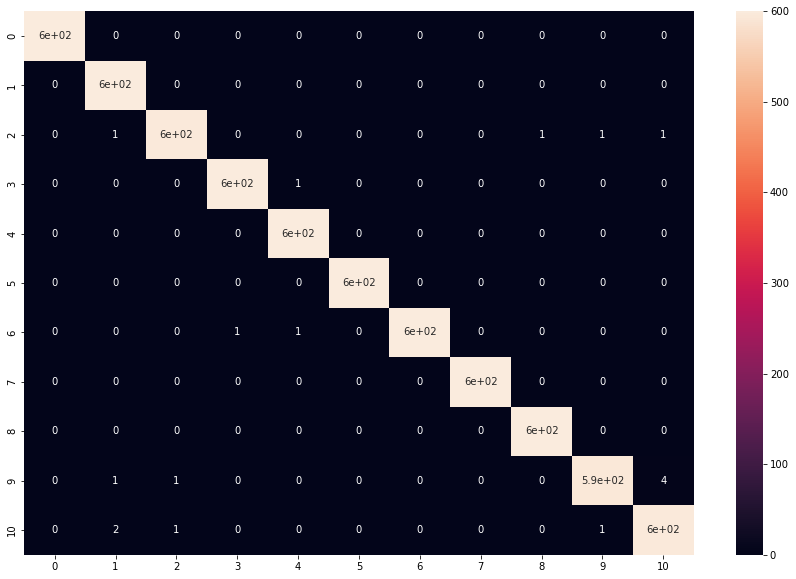

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

**Kaggle Submission**

Explore said we should submit to kaggle

In [23]:
submission_df = pd.read_csv('sample_submission.csv')
submission_df

,index,lang_id
0,1,tsn
1,2,nbl


**Transforming our test data**

In [24]:
test = tfidf.transform(test_df['text']).toarray()

**prediction on unseen data**

In [25]:
# then make prediction on the unseen 
lang = clf.predict(test)


In [26]:
# we will then transform the numerics in the predictions to the initial language categorical labels
lang = le.inverse_transform(lang)

In [27]:
# extracting the index column
index = test_df['index']
index

0          1
1          2
2          3
3          4
4          5
        ... 
5677    5678
5678    5679
5679    5680
5680    5681
5681    5682
Name: index, Length: 5682, dtype: int64

In [28]:
final_df = pd.DataFrame({'index': index, 'lang_id': lang})
final_df.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [29]:
final_df.to_csv('multihyper_last.csv', index=False)